# Demo Notebook: Continuous Time

In this notebook, we'll demonstrate usage of a continuous time version of this model, with dynamics as given in our ongoing notes. 

In [204]:
using AdaptiveOpinions # package with custom code. 
using LightGraphs
using GraphPlot
using Plots
using DifferentialEquations
using LinearAlgebra

We first need to define a substrate graph.

In [205]:
# make a graph
G = graphfamous("karate")
n = nv(G)
A = LightGraphs.LinAlg.adjacency_matrix(G);

We then set a random vector `x` of initial opinions and a vector `z` whose `i`th element is `1` iff node `i` is a zealot. 

In [372]:
function randomInitialization(n)
    x = 1 .- 2*rand(Float64, n)

    z = zeros(n)
    z[1] = 1
    z[end] = 1

    x[1] = 1
    x[end] = -1
    
    return(x, z)
end

randomInitialization (generic function with 1 method)

In [429]:
# dynamical parameters
γ = 2.0
β = 1.0
δ = .9

0.9

## Solve the ODE system

In [430]:
# initial condition
x, z = randomInitialization(n);

# preallocate the increment vector
dx = zeros(n)
# collect parameters
p = (A, z, β, γ, δ)
# time interval over which to solve
tspan = (0.0, 500.0)
# solve the ODE
prob = ODEProblem(dynamics!, x, tspan, p)
# retrieve the solutions
sol = solve(prob);

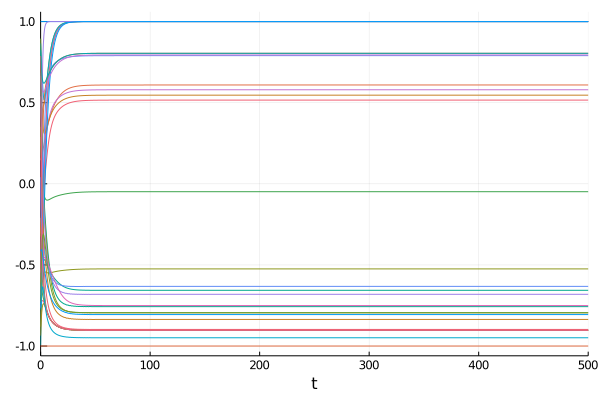

In [431]:
plot(sol, legend = false)

In [432]:
function plotState(G, X, z, locs_x, locs_y, color_pal)

    node_colors = [color_pal[trunc(Int, 1.0+(n_colors-1.0)*(x - minimum(X))/(maximum(X) - minimum(X)))] for x in X]
    zealots = [z[i] == 1.0 for i ∈ 1:n]
    zealot_highlight = [zealots[i] ? colorant"black" : nothing for i ∈ 1:n]
    p = gplot(G, locs_x, locs_y, nodefillc = node_colors, nodestrokec = zealot_highlight, nodestrokelw = 1)
    return p
end

locs_x, locs_y = spring_layout(G)

# plotting colors
n_colors = 30
color_pal = range(colorant"lightseagreen", stop=colorant"orange", length=n_colors);

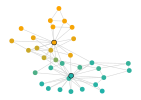

In [433]:
# plot the graph state at the end of the simulation
plotState(G, sol.u[end],z, locs_x, locs_y, color_pal)

# Jacobians

In [434]:
J = Matrix(analyticJacobian(sol.u[end], p))

evals = eigvals(J)

zeroVecs = eigvecs(J)[:,abs.(evals) .≈ 0];

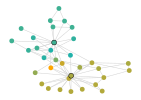

In [435]:
# plot some eigenvectors in the null space

plotState(G, zeroVecs[:,2],z, locs_x, locs_y, color_pal)